In [76]:
import pandas as pd
import json
import numpy as np

def __shorten_version(versions):
    return int(versions[-1]["created"].split()[3])

def __parse_json_record(record):
    record_dict = [json.loads(record)]
    record_df = pd.DataFrame(record_dict)
    version = record_df["versions"].apply(lambda x: __shorten_version(x))
    record_df.insert(8,"version", version)
    record_df.drop(["id", "authors", "submitter", "license", "journal-ref", "update_date", "comments", "report-no", "doi", "versions"], axis=1, inplace=True)

    return record_df

years = {}
path = 'data//arxiv-metadata-oai-snapshot.json'
with open(path, 'r') as file:
    records = pd.DataFrame()
    i = 0
    for line in file:
        parsed_line = __parse_json_record(line)[["version","abstract"]]
        year = parsed_line["version"].values[0]

        if i == 0:
            records = parsed_line
            records.index = [i]
            i += 1
            years.setdefault(year,0)
            years[year] += 1
            continue

        i +=1
        years.setdefault(year,0)
        if years[year] >= 3:
            continue
        years[year] += 1
        records.loc[i] = parsed_line.values[0]
        
        if i > 300000:
            break

years = pd.DataFrame(years, index=[0])
display(years)
np.save("150_records", records.values)
records

: 

: 

In [57]:
from scipy.sparse import load_npz
X_unfiltered = load_npz("30k_regression_dataset.npz")
X_unfiltered.shape


(30000, 57157)

In [58]:
import numpy as np

y_unfiltered = np.load("30k_regression_labels.npy")
y_unfiltered.shape

(30000,)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023] [25135  3433   728   263   153    79    45    30    22    30    21    15
    15     9     8    13     1]
Picked years [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


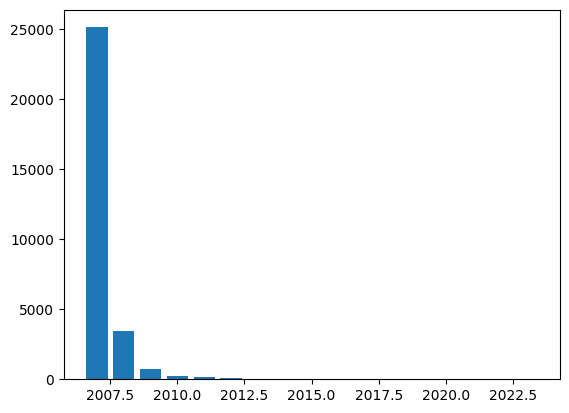

In [59]:
import matplotlib.pyplot as plt

unique_labels, label_counts = np.unique(y_unfiltered, return_counts=True)
plt.bar(unique_labels, label_counts)
print(unique_labels, label_counts)
picked_years = label_counts >= 20
picked_years = unique_labels[picked_years]
print("Picked years", picked_years)

##### Pick lowest occurrence